In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

def plot_data(df):
    table = df.groupby(['M', 'N', 'K'])['time'].mean().unstack()
    for m in table.index.get_level_values(0).unique():
        table.loc[m].plot(figsize=(12,3), grid=True,marker='*')
        plt.title('m='+str(m))
        plt.ylabel('time')
        plt.show()

# Get Data

In [2]:
# ------------------------------  Add code here ------------------------------#
# The code below reads a sample file. Replace sample.csv with gemm_extimes.csv
# to access your collected data set.
# --------------------------------------------------------------------------- #
df = pd.read_csv('sample.csv')

# Visualize Data

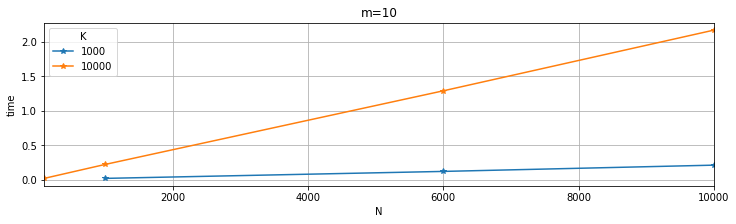

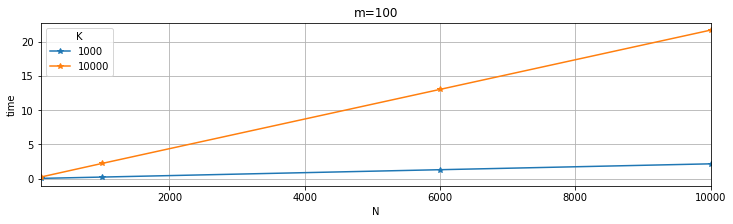

In [3]:
# --------------------------------------------------------------------------- #
# We have provided the plot_data method as an example of how you can visualize
# your data. Feel free to use any other visualization tool that helps
# you find the relationship between inputs and outputs.
# --------------------------------------------------------------------------- #
plot_data(df)

# -------------------- (optional) Add code here ------------------------------#
# Add your code for other ways to visualize data:


# Create Data Set

In [4]:
# --------------------------------------------------------------------------- #
# We will use the 'time' column for our target variable y and the 'M', 'N',
# and 'K' columns for inputs. 
# --------------------------------------------------------------------------- #
raw_X, raw_y = df.drop('time', axis=1), df[['time']]

# Data Preprocessing

In [5]:
# --------------------------------------------------------------------------- #
# Feature engineering is typically an important step in ML to improve model
# accuracy. This inlcudes adding or removing inputs, as well as manipulating
# the input and/or output space. Examples of manipulation methods include
# scaling and feature transformation (polynimial, RBF, logarithmic, etc.).
# Can you think of any new or transformed inputs to help the ML models?
# --------------------------------------------------------------------------- #

# -------------------- (optional) Add code here ------------------------------#
# Replace the lines below to transform raw_X and/or raw_y into your (X, y)
# data set
X = raw_X
y = raw_y

# Train/test Split

In [6]:
# --------------------------------------------------------------------------- #
# We will use 30% of the data set to evaluate our models. Do not modify this
# block
# --------------------------------------------------------------------------- #
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression

In [7]:
# --------------------------------------------------------------------------- #
# Our first model is a linear regressor, documented at
#   https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# --------------------------------------------------------------------------- #
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))

-41.94469907724691


# MLP

In [8]:
# --------------------------------------------------------------------------- #
# The second model is multi-layer perceptron, documented at
#   https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html
# As opposed to simple linear regression, this model has multiple hyperparameters
# that can be tuned to improve accuracy. You can control the number of hidden
# layers and the size of each layer. Note that for hyperparameter tuning we
# are performing cross-validation.
# --------------------------------------------------------------------------- #
parameters = {
    'hidden_layer_sizes' : [
# ------------------------------  Add code here ------------------------------#
# Modify and extend the list below to find an MLP regressor that is most
# accurate for your data. 
        (100, 100, 50, 50),
        (100, 100, 100, 50),
# --------------------------------------------------------------------------- #
    ]
}
mlp = MLPRegressor(random_state=42)
clf = GridSearchCV(mlp, parameters)
clf.fit(X_train, y_train.iloc[:,0])
print('Best hyperparameters:', clf.best_params_)
print('Best model test set score:', clf.score(X_test, y_test))
pd.DataFrame(clf.cv_results_)


Best hyperparameters: {'hidden_layer_sizes': (100, 100, 100, 50)}
Best model test set score: -1798.257139893719


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.020729,0.001325,0.002015,0.000244,"(100, 100, 50, 50)","{'hidden_layer_sizes': (100, 100, 50, 50)}",-291.930995,-34.105099,-1187.932056,-8.654836,-1.904258e+07,-3.808820e+06,7.616879e+06,2
1,0.036618,0.014716,0.002301,0.000300,"(100, 100, 100, 50)","{'hidden_layer_sizes': (100, 100, 100, 50)}",-1684.845350,-101.066487,-4064.211207,-39.773030,-2.322524e+06,-4.656828e+05,9.284218e+05,1


# Other regression models

In [9]:
# ------------------------------  Add code here ------------------------------#
# Choose another regression model from the scikit-learn supervised learning
# library (e.g., SVR, DecissionTreeRegressor):
#   https://scikit-learn.org/stable/supervised_learning.html
# Write your own code to tune hyperparameters if necessary and evaluate the
# accuracy with the test set (X_test, y_test)
